In [1]:
import pandas as pd
import numpy as np

# Parametric Operations

In [9]:
df = pd.read_csv('stats.csv')

In [11]:
df.head()

,ID,Gender,Age,Region,Income,Satisfaction_Score,Education,Spending,Hours_Worked
0,1,Male,49,Rural,3599,6,High School,409,40
1,2,Female,56,Rural,4447,5,PhD,542,56
2,3,Male,49,Urban,3181,6,PhD,583,31
3,4,Male,21,Rural,2783,1,PhD,73,53
4,5,Male,47,Urban,3357,5,Master's,284,57


In [13]:
df.shape

(200, 9)

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,200.0,100.500,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,40.055,12.363099,18.0,29.00,42.0,50.00,59.0
Income,200.0,3015.235,846.062515,217.0,2453.75,3041.5,3518.25,5603.0
Satisfaction_Score,200.0,5.025,2.589964,1.0,3.00,5.0,7.00,9.0
Spending,200.0,405.480,149.945650,-6.0,323.75,411.0,509.50,814.0
Hours_Worked,200.0,44.610,9.050828,30.0,36.75,44.0,53.00,59.0


In [17]:
# Descriptive statistics
print(df.describe())
print(df['Gender'].value_counts())

               ID         Age       Income  Satisfaction_Score   Spending  \
count  200.000000  200.000000   200.000000          200.000000  200.00000   
mean   100.500000   40.055000  3015.235000            5.025000  405.48000   
std     57.879185   12.363099   846.062515            2.589964  149.94565   
min      1.000000   18.000000   217.000000            1.000000   -6.00000   
25%     50.750000   29.000000  2453.750000            3.000000  323.75000   
50%    100.500000   42.000000  3041.500000            5.000000  411.00000   
75%    150.250000   50.000000  3518.250000            7.000000  509.50000   
max    200.000000   59.000000  5603.000000            9.000000  814.00000   

       Hours_Worked  
count    200.000000  
mean      44.610000  
std        9.050828  
min       30.000000  
25%       36.750000  
50%       44.000000  
75%       53.000000  
max       59.000000  
Gender
Male      100
Female    100
Name: count, dtype: int64


## DATA VISUALIZATION

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

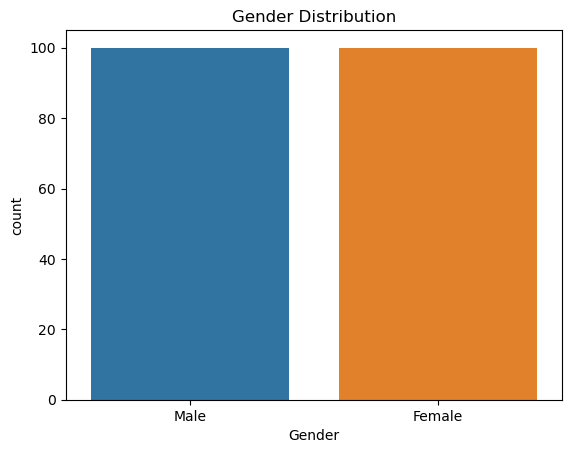

In [22]:
# Categorical data: Bar chart
sns.countplot(data=df, x='Gender',hue='Gender')
plt.title("Gender Distribution")
plt.show()

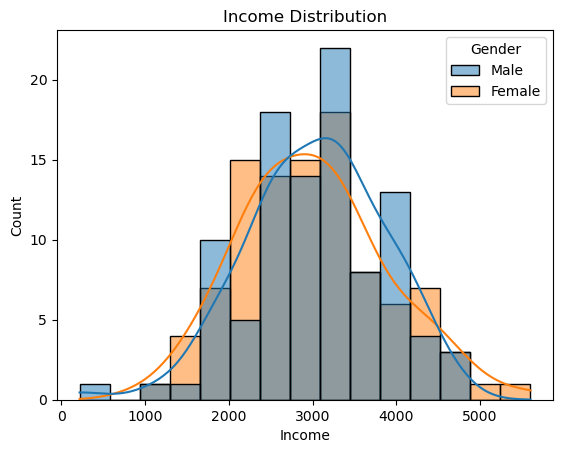

In [24]:
# Continuous data: Histogram
sns.histplot(data=df, x='Income', kde=True,hue='Gender')
plt.title("Income Distribution")
plt.show()

In [26]:
df.columns

Index(['ID', 'Gender', 'Age', 'Region', 'Income', 'Satisfaction_Score',
       'Education', 'Spending', 'Hours_Worked'],
      dtype='object')

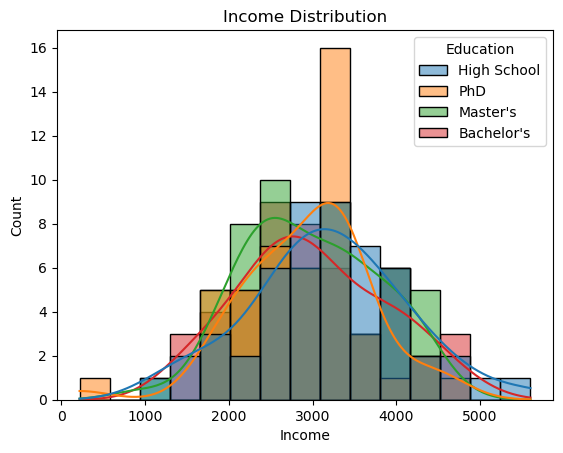

In [28]:
# Continuous data: Histogram
sns.histplot(data=df, x='Income', kde=True,hue='Education')
plt.title("Income Distribution")
plt.show()

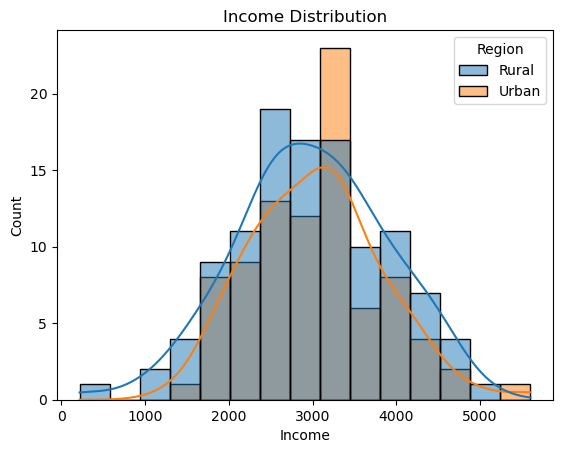

In [30]:
# Continuous data: Histogram
sns.histplot(data=df, x='Income', kde=True,hue='Region')
plt.title("Income Distribution")
plt.show()

# 4. T-Tests

In [33]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel

In [35]:
# One-sample t-test
print(ttest_1samp(df['Income'], popmean=3000))

TtestResult(statistic=0.2546566388428369, pvalue=0.7992512759173915, df=199)


#### No significant difference from he population mean

## Two-Sample t test

In [39]:
# Two-sample t-test
male_income = df[df['Gender'] == 'Male']['Income']
female_income = df[df['Gender'] == 'Female']['Income']
print(ttest_ind(male_income, female_income))

TtestResult(statistic=0.25172201450635834, pvalue=0.8015170172525536, df=198.0)


##### No significant diference

## Paired t-test (example)

In [44]:
print(ttest_rel(df['Satisfaction_Score'], df['Hours_Worked'][:len(df['Satisfaction_Score'])]))

TtestResult(statistic=-57.75832889389677, pvalue=2.724297616218862e-126, df=199)


# 5. Chi-Square Analysis

In [47]:
from scipy.stats import chi2_contingency

In [49]:
# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Region'])

In [51]:
contingency_table

Region,Rural,Urban
Gender,,
Female,58,42
Male,55,45


In [55]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 0.08137524158274845, p-value: 0.7754423050225463


# 6. ANOVA

In [58]:
from scipy.stats import f_oneway

In [60]:
# One-way ANOVA
anova_result = f_oneway(df[df['Education'] == "High School"]['Income'],
                        df[df['Education'] == "Bachelor's"]['Income'],
                        df[df['Education'] == "Master's"]['Income'],
                        df[df['Education'] == "PhD"]['Income'])
print(anova_result)

F_onewayResult(statistic=0.846111974129244, pvalue=0.47017091042738324)


# Non-Parametric Statistical Operations

Mann-Whitney U Test (Two-sample test, non-parametric alternative to a t-test)


Wilcoxon Signed-Rank Test (Paired data, non-parametric alternative to paired t-test

                           
Kruskal-Wallis Test (Non-parametric alternative to one-way ANOVA)

                           
Friedman Test (Non-parametric alternative to repeated measures ANOVA)

                           
Spearman's Rank Correlation (Non-parametric correlation)

                           
Chi-Square Test (For categorical data)

                           
Kolmogorov-Smirnov Test (To compare two distributions)

In [69]:
df = pd.read_csv("non_parametric_data.csv")

In [71]:
df.head()

,Region,Income,Satisfaction_Score,Spending
0,Urban,95,4,540
1,Rural,3035,3,583
2,Urban,1132,7,692
3,Urban,2131,8,545
4,Urban,7143,4,457


In [73]:
df.shape

(200, 4)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              200 non-null    object
 1   Income              200 non-null    int64 
 2   Satisfaction_Score  200 non-null    int64 
 3   Spending            200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [77]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income,200.0,3004.915,2754.478533,15.0,854.75,2204.5,4327.75,13831.0
Satisfaction_Score,200.0,5.625,3.013266,1.0,3.00,5.0,8.00,10.0
Spending,200.0,376.065,365.815041,1.0,122.25,268.5,533.25,2192.0


In [81]:
df.isnull().sum()

Region                0
Income                0
Satisfaction_Score    0
Spending              0
dtype: int64

# (A) Mann-Whitney U Test

#### Compare Income between Urban and Rural regions

In [85]:
from scipy.stats import mannwhitneyu

In [87]:
urban_income = df[df['Region'] == 'Urban']['Income']
rural_income = df[df['Region'] == 'Rural']['Income']

stat, p = mannwhitneyu(urban_income, rural_income, alternative='two-sided')
print(f"Mann-Whitney U Test Statistic: {stat}, p-value: {p}")

Mann-Whitney U Test Statistic: 5558.5, p-value: 0.17275237237786933


# (B) Wilcoxon Signed-Rank Test

#### Compare Satisfaction_Score before and after an intervention (hypothetical paired data).

In [91]:
from scipy.stats import wilcoxon

# Simulate paired data
before = df['Satisfaction_Score']
after = before + np.random.randint(-2, 3, size=len(before))

In [93]:
before.head()

0    4
1    3
2    7
3    8
4    4
Name: Satisfaction_Score, dtype: int64

In [95]:
after.head()

0     3
1     3
2     7
3    10
4     6
Name: Satisfaction_Score, dtype: int64

In [97]:
stat, p = wilcoxon(before, after)
print(f"Wilcoxon Signed-Rank Test Statistic: {stat}, p-value: {p}")

Wilcoxon Signed-Rank Test Statistic: 6093.0, p-value: 0.7366755314107271


# (C) Kruskal-Wallis Test

#### Compare Income across multiple regions (e.g., Urban vs. Rural).

In [101]:
from scipy.stats import kruskal

stat, p = kruskal(df[df['Region'] == 'Urban']['Income'],
                  df[df['Region'] == 'Rural']['Income'])
print(f"Kruskal-Wallis Test Statistic: {stat}, p-value: {p}")

Kruskal-Wallis Test Statistic: 1.8622279748832447, p-value: 0.17236788011207682


# (D) Friedman Test

#### Compare Satisfaction_Score across multiple conditions (hypothetical).

In [110]:
from scipy.stats import friedmanchisquare

In [112]:
# Simulate repeated measures data
condition1 = df['Satisfaction_Score']
condition2 = condition1 + np.random.randint(-2, 3, size=n)
condition3 = condition1 + np.random.randint(-3, 2, size=n)

In [114]:
stat, p = friedmanchisquare(condition1, condition2, condition3)
print(f"Friedman Test Statistic: {stat}, p-value: {p}")

Friedman Test Statistic: 55.61054172767199, p-value: 8.400870614707714e-13


## (E) Spearman’s Rank Correlation

#### Check correlation between Income and Spending

In [118]:
from scipy.stats import spearmanr

stat, p = spearmanr(df['Income'], df['Spending'])
print(f"Spearman's Rank Correlation: {stat}, p-value: {p}")

Spearman's Rank Correlation: -0.06823285431908573, p-value: 0.3370404879019855


# (F) Kolmogorov-Smirnov Test

#### Compare the distribution of Income and Spendin

In [122]:
from scipy.stats import ks_2samp

stat, p = ks_2samp(df['Income'], df['Spending'])
print(f"Kolmogorov-Smirnov Test Statistic: {stat}, p-value: {p}")

Kolmogorov-Smirnov Test Statistic: 0.685, p-value: 4.792055985422256e-45


# Visualization of Non-Parametric Data

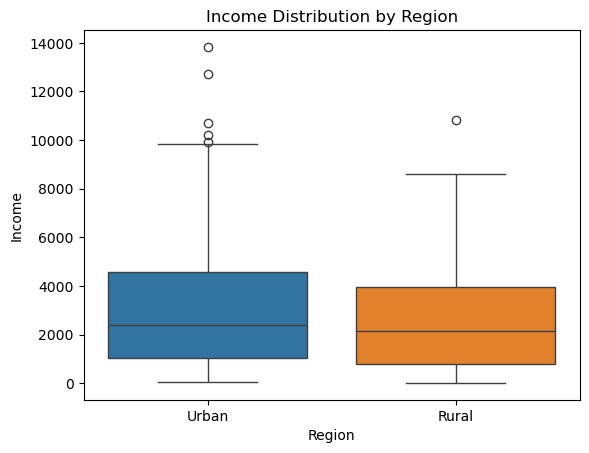

In [127]:
# Boxplot
sns.boxplot(data=df, x='Region', y='Income',hue='Region')
plt.title("Income Distribution by Region")
plt.show()

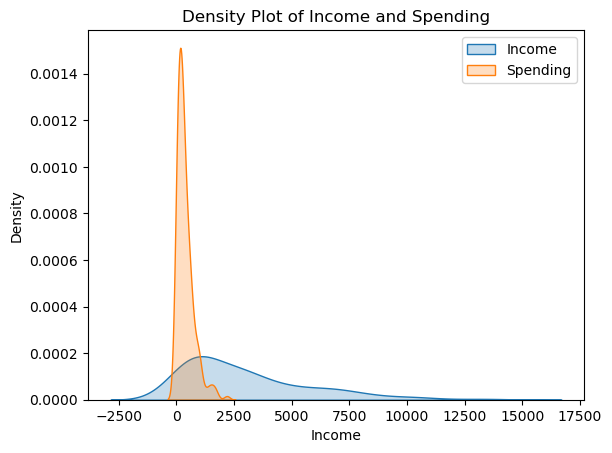

In [129]:
# Density Plot
sns.kdeplot(df['Income'], label='Income', fill=True)
sns.kdeplot(df['Spending'], label='Spending', fill=True)
plt.legend()
plt.title("Density Plot of Income and Spending")
plt.show()

# Normality Tests

Shapiro-Wilk Test: Tests if the data follows a normal distribution


Kolmogorov-Smirnov Test: Compares the sample distribution to a normal distribution.


Anderson-Darling Test: Similar to Kolmogorov-Smirnov but gives critical values for significance.

                                                                              
Visualizations:

Histogram

Q-Q Plot (Quantile-Quantile Plot)
                                                                              
Skewness and Kurtosis: Provides numerical measures of normality.


# Generate Dataset

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
data = {
    "Normal_Distribution": np.random.normal(loc=50, scale=10, size=200),  # Normally distributed
    "Skewed_Distribution": np.random.exponential(scale=2, size=200),      # Skewed distribution
}
df = pd.DataFrame(data)

In [138]:
df.head()

,Normal_Distribution,Skewed_Distribution
0,54.967142,4.197217
1,48.617357,2.700068
2,56.476885,2.388149
3,65.230299,2.424575
4,47.658466,0.890985


In [140]:
df.shape

(200, 2)

In [148]:
df.columns

Index(['Normal_Distribution', 'Skewed_Distribution'], dtype='object')

# Shapiro-Wilk Test

In [173]:
from scipy.stats import shapiro

for col in df.columns:
    stat, p = shapiro(df[col])
    print(f"Shapiro-Wilk Test for {col} -> Statistic: {stat:.4f}, p-value: {p:.4f}")
    if p > 0.05:
        print(f"{col} follows a normal distribution.\n")
    else:
        print(f"{col} does not follow a normal distribution.\n")

Shapiro-Wilk Test for Normal_Distribution -> Statistic: 0.9956, p-value: 0.8290
Normal_Distribution follows a normal distribution.

Shapiro-Wilk Test for Skewed_Distribution -> Statistic: 0.8640, p-value: 0.0000
Skewed_Distribution does not follow a normal distribution.



In [171]:
df.columns

Index(['Normal_Distribution', 'Skewed_Distribution'], dtype='object')

# Kolmogorov-Smirnov Test

In [175]:
from scipy.stats import kstest

for col in df.columns:
    stat, p = kstest(df[col], 'norm', args=(df[col].mean(), df[col].std()))
    print(f"Kolmogorov-Smirnov Test for {col} -> Statistic: {stat:.4f}, p-value: {p:.4f}")
    if p > 0.05:
        print(f"{col} follows a normal distribution.\n")
    else:
        print(f"{col} does not follow a normal distribution.\n")

Kolmogorov-Smirnov Test for Normal_Distribution -> Statistic: 0.0386, p-value: 0.9156
Normal_Distribution follows a normal distribution.

Kolmogorov-Smirnov Test for Skewed_Distribution -> Statistic: 0.1456, p-value: 0.0004
Skewed_Distribution does not follow a normal distribution.



# Anderson-Darling Test

In [178]:
from scipy.stats import anderson

for col in df.columns:
    result = anderson(df[col], dist='norm')
    print(f"Anderson-Darling Test for {col}:")
    print(f"Statistic: {result.statistic:.4f}")
    for i, crit_val in enumerate(result.critical_values):
        print(f"  Significance Level: {result.significance_level[i]}% -> Critical Value: {crit_val:.4f}")
    if result.statistic < result.critical_values[2]:
        print(f"{col} follows a normal distribution at 5% significance.\n")
    else:
        print(f"{col} does not follow a normal distribution at 5% significance.\n")

Anderson-Darling Test for Normal_Distribution:
Statistic: 0.2747
  Significance Level: 15.0% -> Critical Value: 0.5650
  Significance Level: 10.0% -> Critical Value: 0.6440
  Significance Level: 5.0% -> Critical Value: 0.7720
  Significance Level: 2.5% -> Critical Value: 0.9010
  Significance Level: 1.0% -> Critical Value: 1.0710
Normal_Distribution follows a normal distribution at 5% significance.

Anderson-Darling Test for Skewed_Distribution:
Statistic: 6.7167
  Significance Level: 15.0% -> Critical Value: 0.5650
  Significance Level: 10.0% -> Critical Value: 0.6440
  Significance Level: 5.0% -> Critical Value: 0.7720
  Significance Level: 2.5% -> Critical Value: 0.9010
  Significance Level: 1.0% -> Critical Value: 1.0710
Skewed_Distribution does not follow a normal distribution at 5% significance.



# DATA VISUALISATIONS

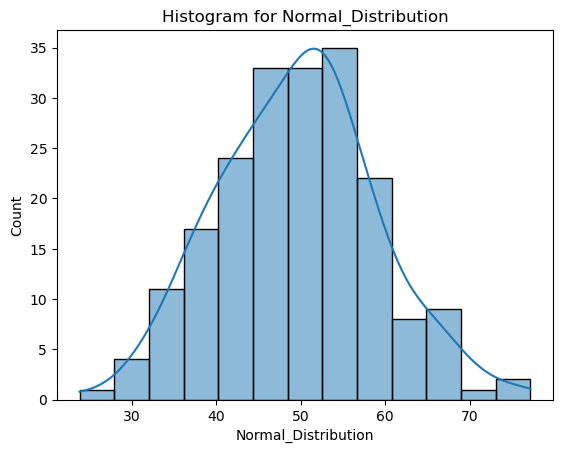

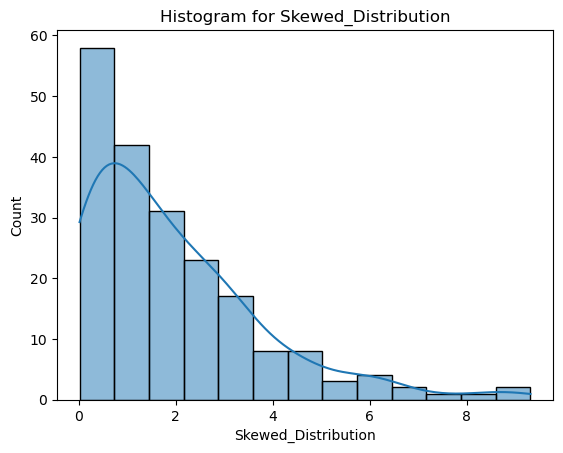

In [181]:
# Histogram
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram for {col}")
    plt.show()

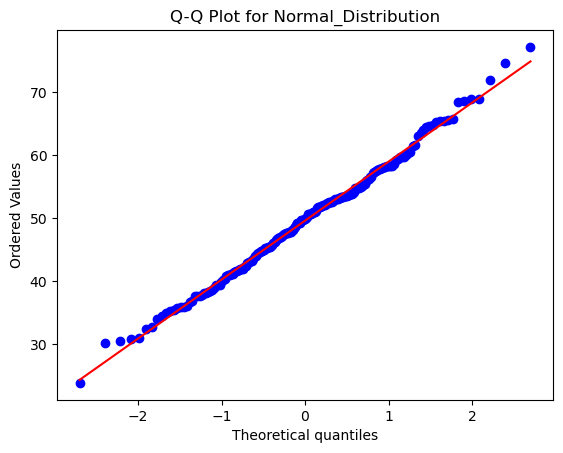

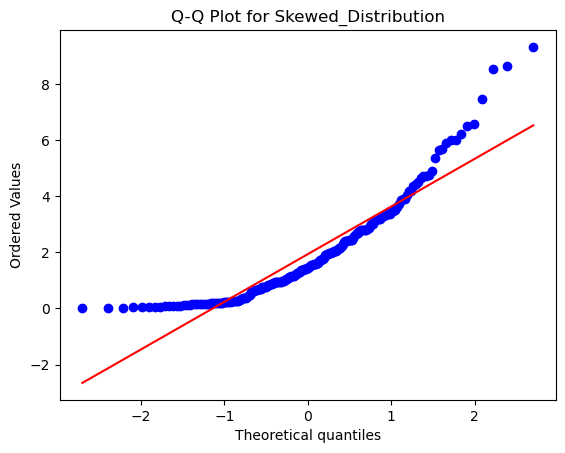

In [187]:
# Q-Q Plot
import scipy.stats as stats
import matplotlib.pyplot as plt
for col in df.columns:
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.show()

# Skewness and Kurtosis

In [193]:
from scipy.stats import skew, kurtosis

for col in df.columns:
    print(f"{col}:")
    print(f"  Skewness: {skew(df[col]):.4f}")
    print(f"  Kurtosis: {kurtosis(df[col]):.4f}\n")

Normal_Distribution:
  Skewness: 0.1325
  Kurtosis: -0.0018

Skewed_Distribution:
  Skewness: 1.4637
  Kurtosis: 2.3989

